# Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import f1_score, average_precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, normalize,RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split

from umap import UMAP

import warnings
warnings.filterwarnings("ignore")

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\umap\distances.py:

# Data Loading & Atibute Description
Pada Tahap Data Loading, hal yang dilakukan adalah :
- Mengimpor dataset
- Menampilkan tabel dataset (teratas dan terbawah)
- Melihat jumlah baris dan kolom
- Melihat informasi tiap variabel

In [2]:
# Mengimpor dataset
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [4]:
df.shape

(8950, 18)

Terdapat 8950 baris dan 18 kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Data Cleaning
Pada tahap data cleaning, hal yang dilakukan adalah :
- Mengecek missing value
- Cek duplikasi data

In [7]:
# Describe the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Mean BALANCE is $1,564

BALANCE_FREQUENCY is frequently updated on average ~0.9

PURCHASES average is $1,000

ONEOFF_PURCHASES average is ~$600

Average PURCHASES_FREQUENCY is around 0.5

Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY

Average CREDIT_LIMIT is ~$4,500

Average PRC_FULL_PAYMENT is 15%

Average TENURE is 11.5 years

In [8]:
# Custom colors
class clr:
    S = '\033[1m' + '\033[92m'
    E = '\033[0m' 

# Check the missing data
print(df.isnull().sum())
print(clr.S+'----------------------------------------\n Percentage of missing data: \n'+clr.E)
print((df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum()/df['CUST_ID'].count())*100) 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
----------------------------------------
 Percentage of missing data: 

MINIMUM_PAYMENTS    3.497207
CREDIT_LIMIT        0.011173
dtype: float64


In [9]:
print(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum())
# print(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull())

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
dtype: int64


In [10]:
print(df['CUST_ID'].count())

8950


Dilanjutkan dengan mengisi missing elements dengan nilai rata-rata dari setiap variabel

<!-- dilanjutkan dengan mengisi missing elements dengan nilai rata2 dari setiap variabel -->

In [11]:
# Fill up the missing elements with mean of the MINIMUM_PAYMENTS
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 
                  'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

# Fill up the missing elements with mean of the CREDIT_LIMIT
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 
                  'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# Chek duplicated entries in the data
df2 = df.copy()
print(clr.S+'Duplicated in this dataset:'+clr.E, df.duplicated().sum())

Duplicated in this dataset: 0


tidak terdapat duplikasi data

## menghilangkan kolom Customer ID
Hal ini dilakukan karena kolom customer id tidak dibutuhkan dalam clustering

In [13]:
# Drop Customer ID column 'CUST_ID'
df2.drop('CUST_ID', axis = 1, inplace = True)
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
# Get the column names
df2.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Data Exploration

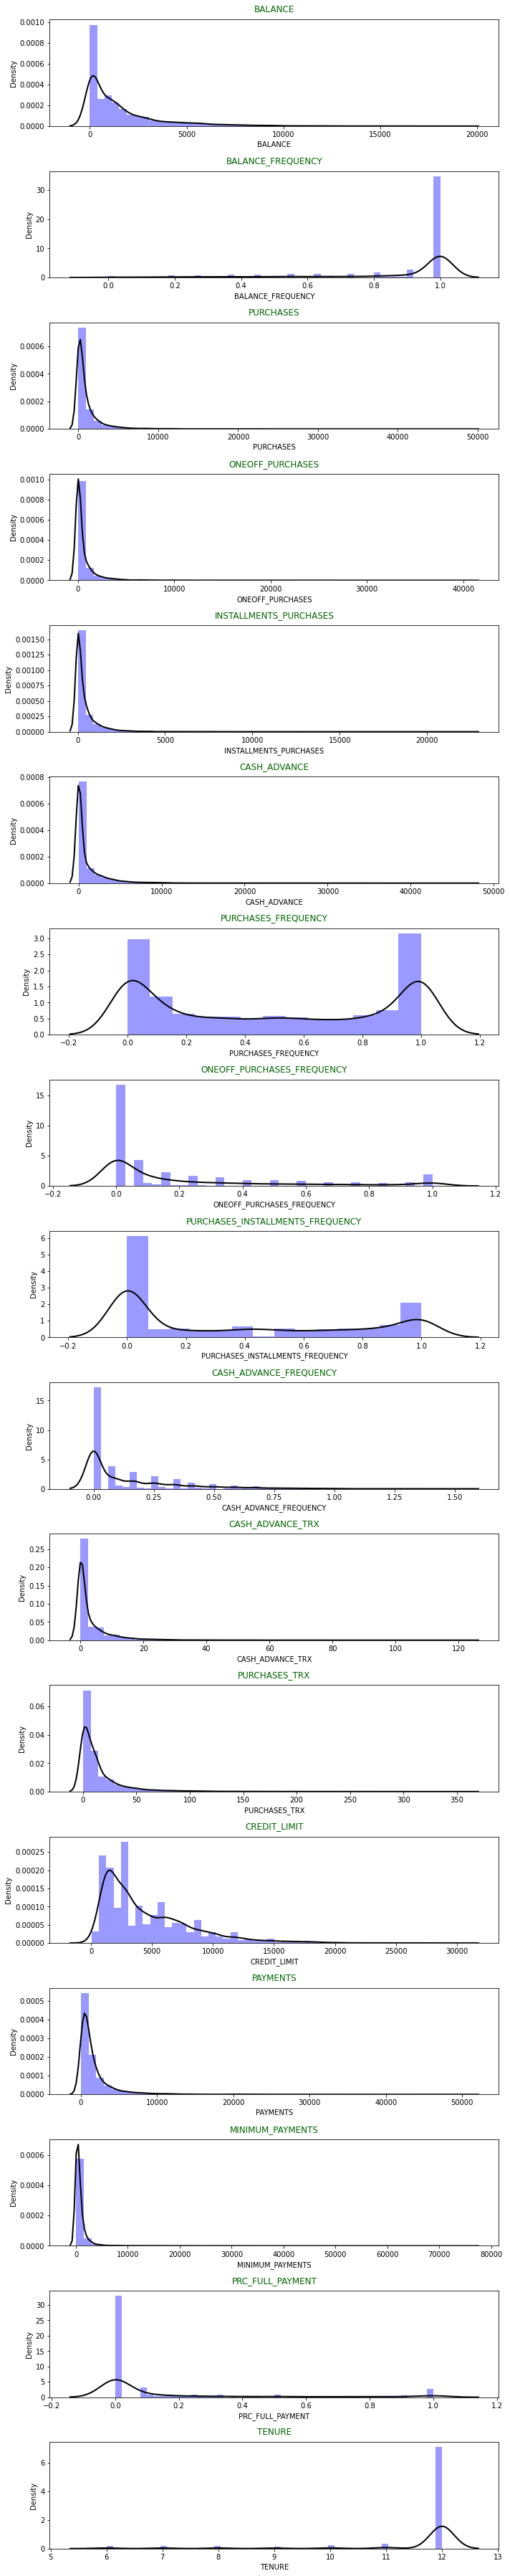

In [15]:
# Plot the distribution
plt.figure(figsize = (10,50))
for i in range(len(df2.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df2[df2.columns[i]], 
                 kde_kws={'color':'black', 'lw':2, 'label':'KDE'}, hist_kws={'color':'blue'})                 
    plt.title(df2.columns[i], color= 'darkgreen', y=1.03)
plt.tight_layout()

dari data terlihat jelas bahwa kebanyakan kolom itu memiliki banyak outlier, dibuktikan dari beberapa grafik nya yang skew negatif dan positif dan tidak terdistribusi di tengah(normal distribution), maka dalam kasus ini saya akan melakukan normalisasi data menggunakan robust scaler disebabkan robust scaler akan melakukan normalisasi data dengan memperhitungkan nilai outliernya.

# Data Preprocessing
- darisini kita akan melakukan elbow method untuk sekedar menjadikan acuan rekomendasi untuk menentukan jumlah cluster, dan bukan menjadikan elbow ini sebagai acuan inti sebagai penentuan clusternya, sebab kembali pada algoritma ini bahwa clustering merupakan metode exploratif bukan metode inferensia(predictif).

In [16]:
# Scale the data first
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df2)
df_scaled.shape

(8950, 17)

In [17]:
df_scaled

array([[-0.43226678, -1.63636364, -0.24837108, ..., -0.28285691,
         0.        ,  0.        ],
       [ 1.20937371, -0.81818182, -0.33748873, ...,  1.06254141,
         1.55555556,  0.        ],
       [ 0.84209923,  0.        ,  0.38476593, ...,  0.42064894,
         0.        ,  0.        ],
       ...,
       [-0.44135471, -1.5000045 , -0.20259786, ..., -0.36519846,
         1.75000175, -6.        ],
       [-0.44651662, -1.5000045 , -0.33748873, ..., -0.40365347,
         1.75000175, -6.        ],
       [-0.25997614, -3.        ,  0.68376779, ..., -0.35673145,
         0.        , -6.        ]])

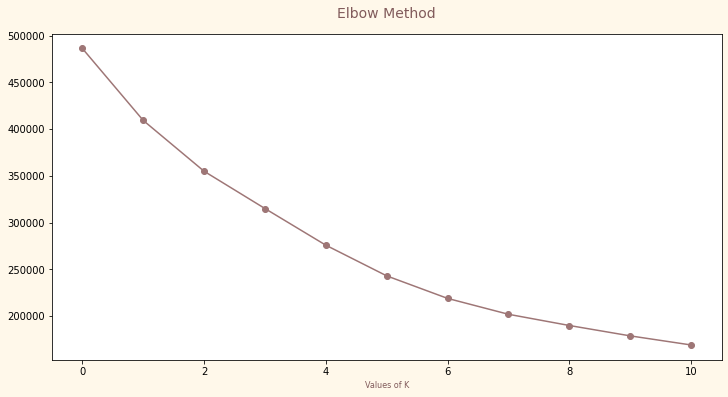

In [18]:
scores_1 = []
range_values = range(1,12)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

plt.figure(figsize = (12,6), facecolor = '#FFF8EA') 
plt.plot(scores_1, 'bx-', marker = 'o', color = '#9E7676')
plt.xlabel('Values of K', fontsize = 8, color='#815B5B')
plt.title('Elbow Method', fontsize = 14, color='#815B5B', y=1.03);

Kita dapat mengamati bahwa, klaster ke-4 tampaknya membentuk siku-siku dari kurva. Namun, nilai-nilai tersebut tidak berkurang secara linear hingga klaster ke-8. Mari kita pilih jumlah cluster menjadi 7 atau 8, namun balik lagi bahwa elbow method ini tidak bisa menjadi acuan utama yang menjadikan cluster itu harus di cluster 7 atau 8, namun sekedar rekomendasi awal saja, perlu analisis lanjutan untuk menentukan cluster tersebut secara optimal.

# Data Modelling

## K-Means


In [19]:
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(df_scaled)
labels = kmeans.labels_ # Labels (cluster) associated to each data point

kmeans.cluster_centers_.shape

(7, 17)

In [20]:
labels[0:11]

array([0, 5, 0, 1, 0, 0, 6, 0, 0, 1, 0])

In [21]:
kmeans.cluster_centers_[0:6]

array([[ 2.92996419e-01, -2.26784721e-01,  2.02688843e-01,
         4.87847330e-01,  3.62343696e-01,  4.82145002e-01,
        -5.20319324e-02,  2.99675191e-01,  2.17904367e-01,
         5.39525413e-01,  5.46521036e-01,  2.11847694e-01,
         1.20729661e-01,  1.10196885e-01,  5.02413622e-01,
         2.31310889e-01, -4.08171521e-01],
       [-3.72143791e-01, -5.68639250e+00, -4.54952639e-02,
         2.57955833e-01,  7.94007771e-02,  3.86689125e-01,
        -2.71827105e-01, -4.27701679e-02,  4.55807256e-02,
         2.33871700e-01,  2.68579686e-01, -1.58495045e-01,
         1.18946506e-01,  1.31795194e-01, -6.57546395e-02,
         7.32936271e-01, -7.62180017e-01],
       [ 1.75117575e+00, -1.02272727e-01,  7.03218237e-01,
         2.43234818e-01,  1.80657034e+00,  1.14334070e+00,
        -2.37013096e-02, -9.24413095e-02,  3.63996690e-01,
         5.22321710e-01,  9.01785714e-01,  7.56696429e-01,
         3.03024781e-01,  7.00995291e-01,  3.25861696e+01,
         1.04166354e-02, -8.9

In [22]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = [df2.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.292996,-0.226785,0.202689,0.487847,0.362344,0.482145,-0.052032,0.299675,0.217904,0.539525,0.546521,0.211848,0.120730,0.110197,0.502414,0.231311,-0.408172
1,-0.372144,-5.686393,-0.045495,0.257956,0.079401,0.386689,-0.271827,-0.042770,0.045581,0.233872,0.268580,-0.158495,0.118947,0.131795,-0.065755,0.732936,-0.762180
2,1.751176,-0.102273,0.703218,0.243235,1.806570,1.143341,-0.023701,-0.092441,0.363997,0.522322,0.901786,0.756696,0.303025,0.700995,32.586170,0.010417,-0.089286
3,-0.390657,-1.246321,0.752370,0.800367,1.232627,0.045658,0.359560,0.604211,0.611022,0.050420,0.045808,0.721262,0.338040,0.320081,-0.225002,5.465052,-0.585998
4,2.455144,-0.412810,26.186841,39.522445,11.622427,0.910565,0.480909,2.532830,0.705050,0.187500,0.465909,7.443182,2.629870,17.972329,4.526802,3.665121,-0.090909
5,1.915716,-0.347067,0.130921,0.457891,0.235031,4.606365,-0.240520,0.192849,0.044838,2.229460,3.898990,0.077967,0.920687,2.036152,1.988157,0.307988,-0.655556
6,1.082686,-0.136858,4.919815,6.328490,3.943065,0.555140,0.518675,2.076400,0.772465,0.339350,0.470614,4.104276,1.072467,2.879903,1.379672,1.561151,-0.078947


In [23]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Fit the KMeans model
y_kmeans = kmeans.fit_predict(df_scaled)
# Calculate Silhoutte Score
score = silhouette_score(df_scaled, kmeans.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.296


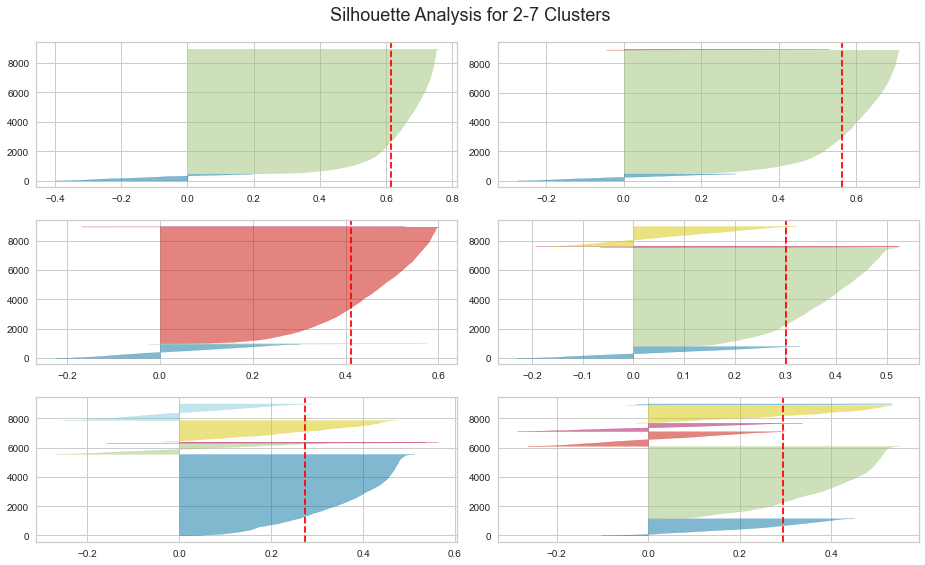

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

# Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier.
# You can find the code to simply create Silhouette visualisation for K-Means clusters with n_cluster as 2, 3, 4, 5, 6, 7 below.

fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

dari shilouettescore ini dapat kita ketahui bahwa cluster ke 5 mendekati 6 lah yang lebih optimal, karna memiliki lebih sedikit distribusi yang mengarah ke nilai negatif. 

# Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

K-MEANS CLUSTERING
- Melihat Jumlah clusters yang optimal dengan menggunakan elbow method

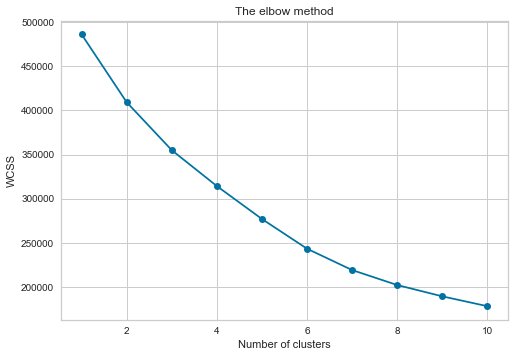

In [26]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


- Melatih model KMeans dengan n_clusters sebanyak 4

In [27]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=3)

-  Menambahkan KMeans Segment pada dataframe

In [28]:
data_kmeans = df.copy()
data_kmeans['KMeans Segment'] = kmeans.labels_

- Melihat informasi data KMeans dengan melakukan groupby berdasarkan rata-rat KMeans segment

In [29]:
data_transf_kmeans = data_kmeans.groupby('KMeans Segment').mean()
data_transf_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeans Segment,,,,,,,,,,,,,,,,,
0,5249.640708,0.959636,26813.470800,21506.773200,5306.697600,1488.363253,0.912667,0.845333,0.728667,0.056667,2.400000,130.240000,15560.000000,27384.597243,3148.432703,0.527424,11.920000
1,1428.414063,0.864624,506.080902,256.414814,249.920780,980.906286,0.437574,0.145139,0.321101,0.141148,3.323856,8.996715,4062.613417,1284.582197,672.644901,0.134205,11.470179
2,4324.419744,0.989214,1085.729492,173.439322,912.290169,1416.709808,0.493965,0.057011,0.451207,0.132768,4.050847,18.694915,4537.288136,2127.718119,22370.136257,0.002825,11.915254
3,2427.730075,0.973305,4452.903561,2862.547668,1591.060725,921.438184,0.917771,0.671084,0.709747,0.087442,2.597689,58.922269,7791.071429,4763.974443,1063.852889,0.315436,11.873950


Dari hasil grouping segment KMeans, selanjutnya kami mencoba membuat kesimpulan tentang segment tersebut dan memberi nama pada segment tersebut.

Disini Penarikan Tunai berkaitan dengan penggunaan kartu kredit dengan penarikan tunai yang biasanya dikenakan biaya dan memiliki tingkat bunga.

- Melakukan pemberian nama pada segment

In [30]:
data_transf_kmeans.rename({0:'Pengguna Level Tengah (Middle Ground)', 
                           1:'Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)', 
                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeans Segment,,,,,,,,,,,,,,,,,
Pengguna Level Tengah (Middle Ground),5249.640708,0.959636,26813.470800,21506.773200,5306.697600,1488.363253,0.912667,0.845333,0.728667,0.056667,2.400000,130.240000,15560.000000,27384.597243,3148.432703,0.527424,11.920000
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers),1428.414063,0.864624,506.080902,256.414814,249.920780,980.906286,0.437574,0.145139,0.321101,0.141148,3.323856,8.996715,4062.613417,1284.582197,672.644901,0.134205,11.470179
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users),4324.419744,0.989214,1085.729492,173.439322,912.290169,1416.709808,0.493965,0.057011,0.451207,0.132768,4.050847,18.694915,4537.288136,2127.718119,22370.136257,0.002825,11.915254
Pengguna Kredit Hemat (Frugal Credit Users),2427.730075,0.973305,4452.903561,2862.547668,1591.060725,921.438184,0.917771,0.671084,0.709747,0.087442,2.597689,58.922269,7791.071429,4763.974443,1063.852889,0.315436,11.873950


- Memasukkan Label KMeans Segment ke dalam dataframe dengan membuat kolom baru

In [31]:
data_kmeans['Labels'] = data_kmeans['KMeans Segment'].map({0:'Pengguna Level Tengah (Middle Ground)', 
                                                           1:'Pengguna dengan Kredit Pembelian Tinggi (High Credit Frequent Purchasers)', 
                                                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                                                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

data_kmeans.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans Segment,Labels
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...


Analisis Segment K-Means

Disini dilakukan plotting atribut pada segment KMeans yang membagi data serta melihat perbedaan antara segmen pelanggan.

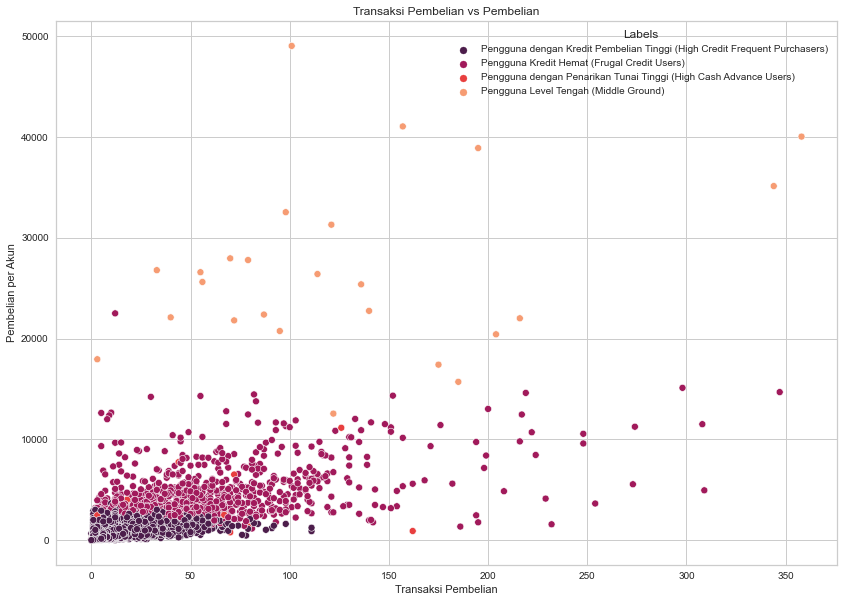

<Figure size 576x396 with 0 Axes>

In [32]:
#sekarang kita dapat mengilustrasikan grup berdasarkan beberapa fitur dalam scatterplot

plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_TRX']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Transaksi Pembelian')
g.set_ylabel('Pembelian per Akun')
g.set_title('Transaksi Pembelian vs Pembelian')
plt.show()

plt.savefig("Transaksi Pembelian vs Pembelian KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

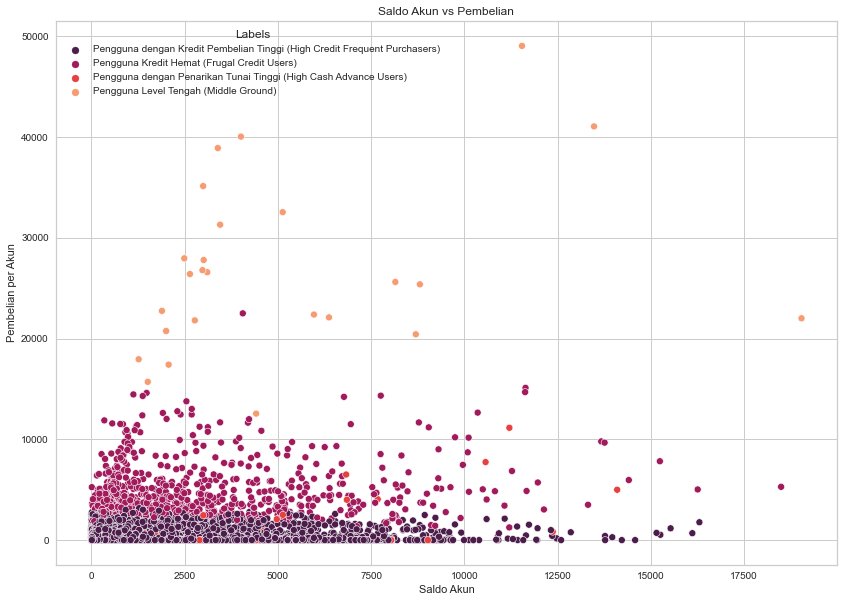

<Figure size 576x396 with 0 Axes>

In [33]:
plt.figure(figsize=(14,10))
X = data_kmeans['BALANCE']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Saldo Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Saldo Akun vs Pembelian')
plt.show()

plt.savefig("Saldo Akun vs Pembelian KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

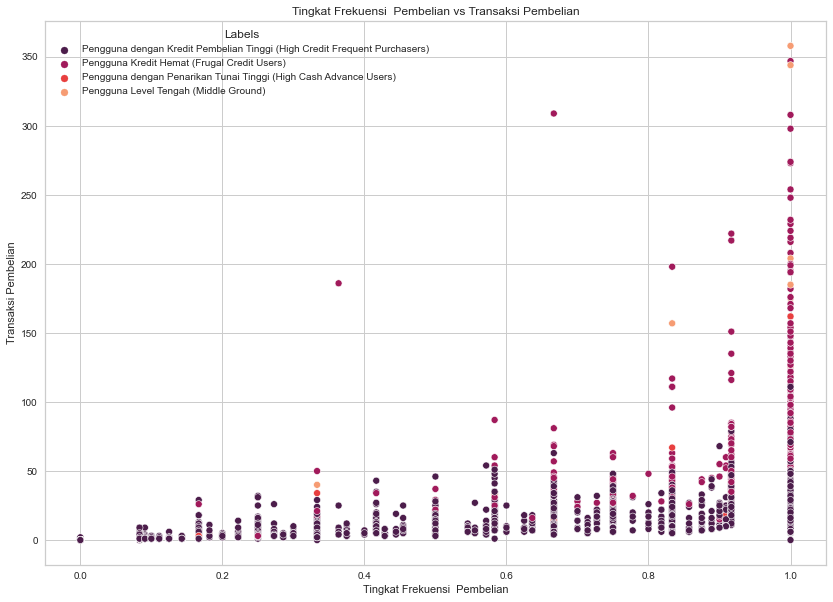

<Figure size 576x396 with 0 Axes>

In [34]:
plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_FREQUENCY']
Y = data_kmeans['PURCHASES_TRX']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Tingkat Frekuensi  Pembelian')
g.set_ylabel('Transaksi Pembelian')
g.set_title('Tingkat Frekuensi  Pembelian vs Transaksi Pembelian')
plt.show()

plt.savefig("Tingkat Frekuensi  Pembelian vs Transaksi Pembelian KMeans.png")

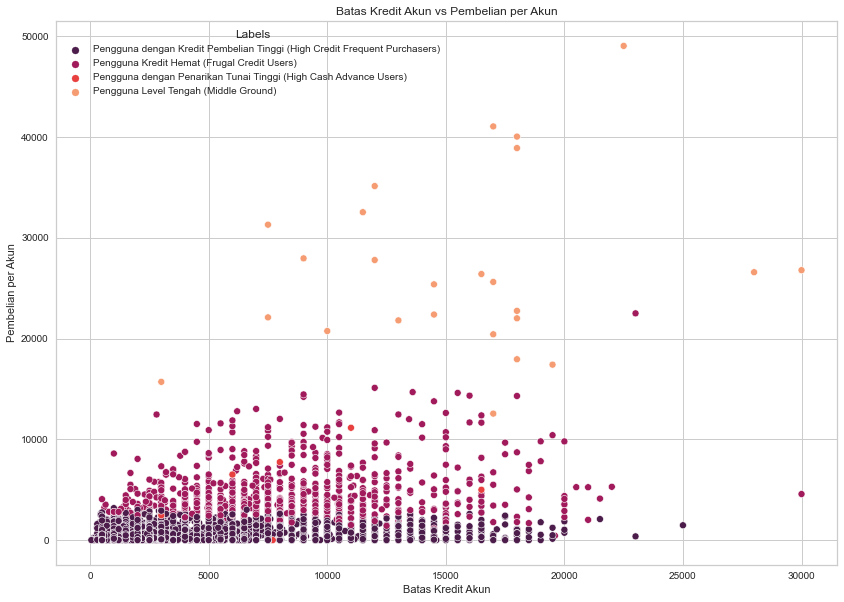

<Figure size 576x396 with 0 Axes>

In [35]:
plt.figure(figsize=(14,10))
X = data_kmeans['CREDIT_LIMIT']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Batas Kredit Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Batas Kredit Akun vs Pembelian per Akun')
plt.show()

plt.savefig("Batas Kredit Akun vs Pembelian per Akun KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            orientation ='landscape')

PCA (Principal Component Analysis)

In [36]:
pca = PCA()
pca

PCA()

In [37]:
principalComponents = pca.fit_transform(df_scaled)

- Melihat nilai variance ratio dari pca

In [38]:
pca.explained_variance_ratio_

array([3.07006673e-01, 2.19398406e-01, 1.27415073e-01, 8.47722617e-02,
       7.33397573e-02, 5.58395398e-02, 3.43372493e-02, 2.75921597e-02,
       2.12030154e-02, 1.56138249e-02, 1.16627738e-02, 9.05979478e-03,
       5.04479469e-03, 4.09889568e-03, 3.38117030e-03, 2.33584081e-04,
       1.02692480e-06])

- Visualisai Principal Components Variance untuk melihat nilai dari components beserta besarnya variance yang ditangkap

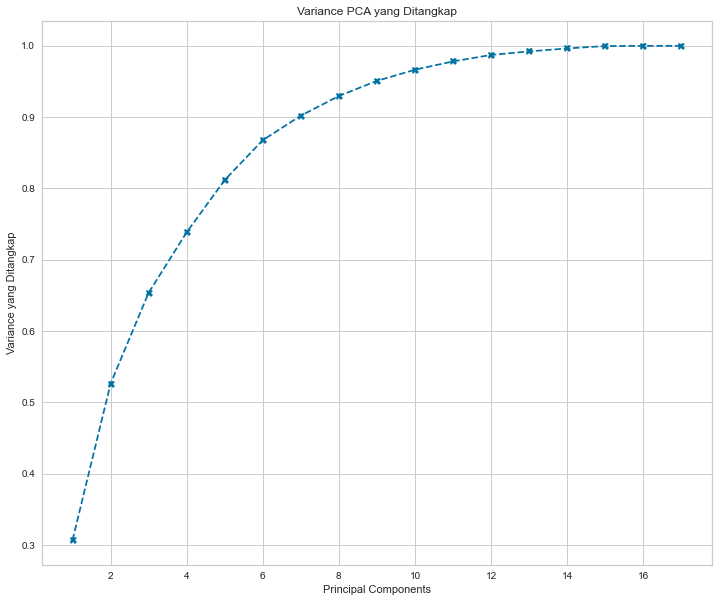

In [39]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='X', linestyle='--', )
plt.title('Variance PCA yang Ditangkap')
plt.xlabel('Principal Components')
plt.ylabel('Variance yang Ditangkap')
plt.show()


# UMAP Application

In [40]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


- Melakukan standarisasi pada dataset

In [41]:
scaler = StandardScaler()
Dfscaled = scaler.fit_transform(df2)
Dfscaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Kemudian kita akan Melakukan visualisasi untuk melihat 2 dimensi dari dataset yang sudah di standarisasi

- Mendefinisikan model dari UMAP

In [42]:
umap_data = UMAP(n_neighbors=100, 
                 n_components=2, # Untuk menganalisa jika bisa dilakukan split data pada 2 components
                 metric='euclidean', 
                 n_epochs=1000, 
                 learning_rate=0.1, #1.0
                 init='spectral',
                 min_dist=0.1, 
                 spread=1.0,
                 low_memory=False, 
                 set_op_mix_ratio=1.0,
                 local_connectivity=1,
                 repulsion_strength=1.0, 
                 negative_sample_rate=5, 
                 transform_queue_size=4.0, 
                 random_state=3,
                 angular_rp_forest=False,
                 target_n_neighbors=-1, 
                 transform_seed=3, 
                 verbose=False, 
                 unique=False,
                )

In [43]:
umap_data

UMAP(learning_rate=0.1, local_connectivity=1, low_memory=False, n_epochs=1000, n_neighbors=100, random_state=3, transform_seed=3)

- Melatih model dari UMAP data

In [44]:
umap_fit = umap_data.fit_transform(Dfscaled)
umap_fit

array([[6.6909885 , 3.904561  ],
       [9.520645  , 7.747142  ],
       [5.3565073 , 8.880592  ],
       ...,
       [0.81742275, 3.0258002 ],
       [9.275685  , 1.712465  ],
       [8.844267  , 1.973344  ]], dtype=float32)

- Melihat dimensi dari UMAP data

In [45]:
umap_fit.shape

(8950, 2)

- Menambahkan nilai UMAP pada dataframe dengan membuat kolom baru

In [46]:
data_umap = pd.concat([df, pd.DataFrame(umap_fit, columns=['UMAP1', 'UMAP2'])], axis=1)

In [47]:
data_umap.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,UMAP1,UMAP2
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6.690989,3.904561
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,9.520645,7.747142
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5.356507,8.880592
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6.145697,3.066029
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7.452193,4.450868


- Melihat dimensi dataframe (opsional)

In [48]:
data_umap.shape

(8950, 20)

- Melihat apakah terdapat missing value pada UMAP data

In [49]:
data_umap.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
UMAP1                               False
UMAP2                               False
dtype: bool

- Menerapkan kembali K-Means ke data yang dikembalikan dari penerapan UMAP yang hanya dengan 2 komponen.

In [50]:
wcss = []
for i in range(1, 18):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans_pca.fit(umap_fit)
    wcss.append(kmeans_pca.inertia_)

- Membuat visualisasi jumlah cluster KMeans dengan UMAP Data

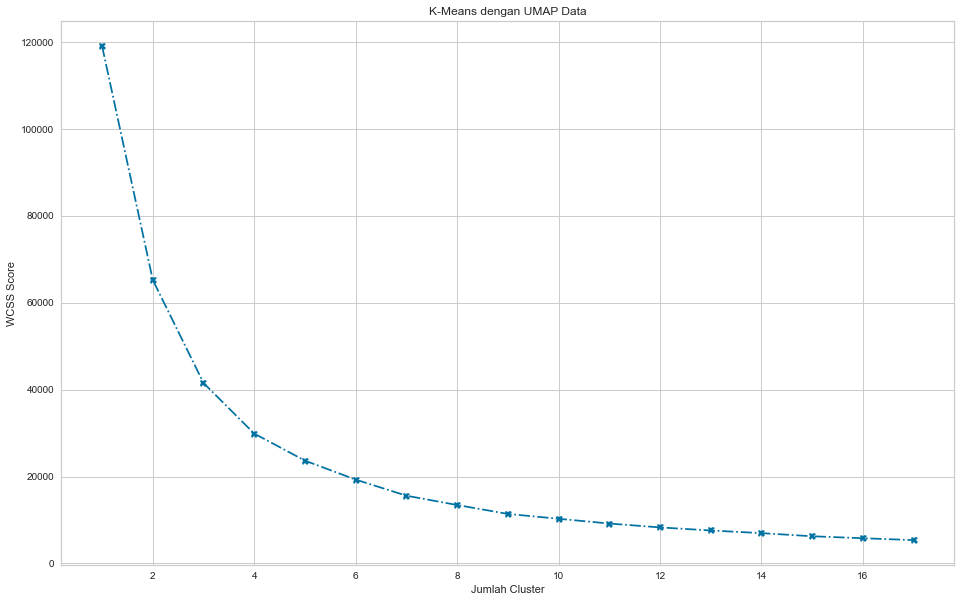

In [51]:
plt.figure(figsize=(16,10))
plt.plot(range(1, 18), wcss, marker='X', linestyle='-.')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS Score')
plt.title('K-Means dengan UMAP Data')
plt.show()

Dengan menggunakan K-Means pada data UMAP, didapatkan jumlah cluster yang optimal yaitu 4 berdasarkan plot Scree. Namun, dengan menggunakan 4 cluster diperoleh score WCSS yang jauh lebih rendah daripada ketika diterapkan pada komponen PCA.

- Melatih KMeans UMAP dengan n_clusters = 4

In [52]:
kmeans_umap = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_umap.fit(umap_fit)

KMeans(n_clusters=4, random_state=42)

- Memasukan hasil KMeans UMAP segmen ke dalam dataframe

In [53]:
data_umap_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(umap_fit)], axis=1)
data_umap_kmeans.columns.values[-2:] = ['UMAP1', 'UMAP2']

data_umap_kmeans['K-Means UMAP Segment'] = kmeans_umap.labels_
data_umap_kmeans

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,UMAP1,UMAP2,K-Means UMAP Segment
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,6.690989,3.904561,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,9.520645,7.747142,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,5.356507,8.880592,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,864.206542,0.000000,12,6.145697,3.066029,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,7.452193,4.450868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,325.594462,48.886365,0.500000,6,0.746933,3.266021,2
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,275.861322,864.206542,0.000000,6,0.823775,2.863155,2
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,0,5,1000.0,81.270775,82.418369,0.250000,6,0.817423,3.025800,2
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6,9.275685,1.712465,1


- Melihat persebaran data pada masing-masing cluster (K-Means UMAP Segment)

In [54]:
data_umap_kmeans['K-Means UMAP Segment'].value_counts()

0    2771
3    2748
1    1908
2    1523
Name: K-Means UMAP Segment, dtype: int64

- Melihat frekuensi rata-rata KMeans UMA Segment dengan melakukan grouping

In [55]:
umap_kmeans_freq = data_umap_kmeans.groupby(['K-Means UMAP Segment']).mean()
umap_kmeans_freq

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,UMAP1,UMAP2
K-Means UMAP Segment,,,,,,,,,,,,,,,,,,,
0,2812.761656,0.983509,337.139047,256.876409,80.460960,2195.831167,0.165093,0.104030,0.077225,0.288322,7.590040,4.128834,5159.715342,2046.742448,1030.168660,0.026355,11.878744,9.309327,6.894590
1,685.443185,0.649072,322.349885,249.340010,73.190063,741.535254,0.193135,0.099880,0.094841,0.101347,1.863732,3.308176,3365.895064,1035.799183,396.640847,0.044725,10.742138,7.142129,2.974208
2,140.980813,0.778875,574.679849,86.773946,488.425719,101.458072,0.777247,0.048623,0.711740,0.020145,0.348654,12.275115,3108.479642,718.589467,209.044588,0.491585,11.067630,2.648892,4.147885
3,1705.002832,0.983120,2385.076408,1449.276739,936.164152,402.794172,0.865690,0.458190,0.648758,0.067885,1.440320,34.645197,5375.330819,2463.390667,1384.601730,0.170559,11.940320,4.331818,7.633863


- Memberikan nama label pada cluster seperti sebelumnya dan menjelajahi beberapa variabel dengan cluster yang dihasilkan dengan segmen UMAP

In [56]:
data_umap_kmeans['Labels'] = data_umap_kmeans['K-Means UMAP Segment'].map({0:'Pengguna yang Bergantung Pada Uang Muka', 
                                                                           1:'Pengguna dengan Pembelian dan Kredit Besar', 
                                                                           2:'Pengguna Normal (Standard)', 
                                                                           3:'Pengguna dengan Cicilan Pembelian dan Minimal Kredit'})

In [57]:
data_umap_kmeans.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,UMAP1,UMAP2,K-Means UMAP Segment,Labels
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,6.690989,3.904561,1,Pengguna dengan Pembelian dan Kredit Besar
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,9.520645,7.747142,0,Pengguna yang Bergantung Pada Uang Muka
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,5.356507,8.880592,3,Pengguna dengan Cicilan Pembelian dan Minimal ...
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,864.206542,0.000000,12,6.145697,3.066029,1,Pengguna dengan Pembelian dan Kredit Besar
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,7.452193,4.450868,1,Pengguna dengan Pembelian dan Kredit Besar


- Melakukan eksplorasi pada UMAP K-Means Clusters

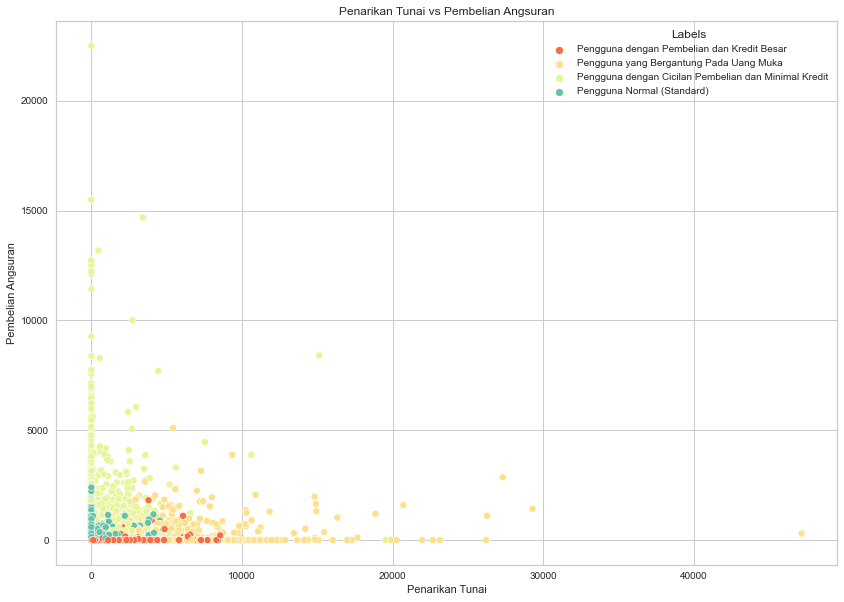

<Figure size 576x396 with 0 Axes>

In [58]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['CASH_ADVANCE']
Y = data_umap_kmeans['INSTALLMENTS_PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['Labels'], palette = 'Spectral')
g.set_xlabel('Penarikan Tunai')
g.set_ylabel('Pembelian Angsuran')
g.set_title('Penarikan Tunai vs Pembelian Angsuran')
plt.show()

plt.savefig("Penarikan Tunai vs Pembelian Angsuran UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

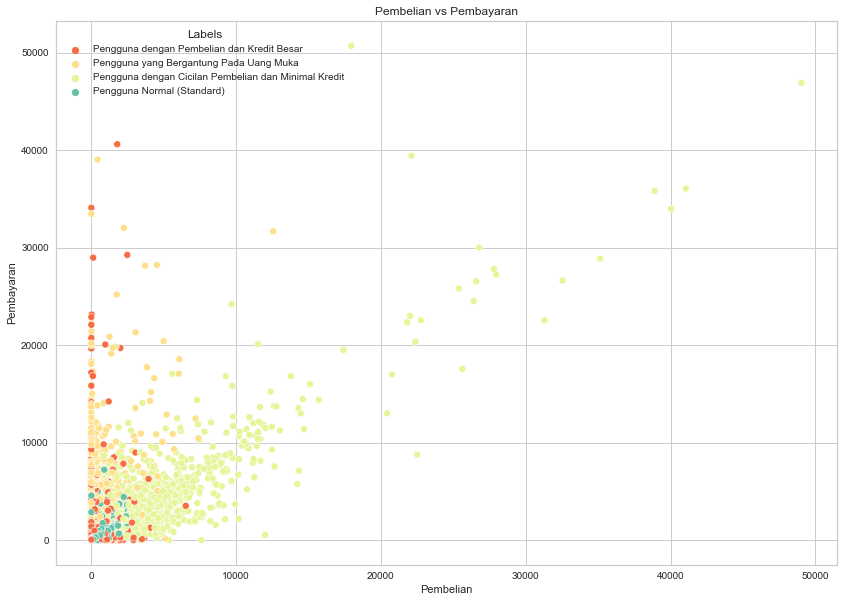

<Figure size 576x396 with 0 Axes>

In [59]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['PURCHASES']
Y = data_umap_kmeans['PAYMENTS']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['Labels'], palette = 'Spectral')
g.set_xlabel('Pembelian')
g.set_ylabel('Pembayaran')
g.set_title('Pembelian vs Pembayaran')

plt.show()

plt.savefig("Pembelian vs Pembayaran UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

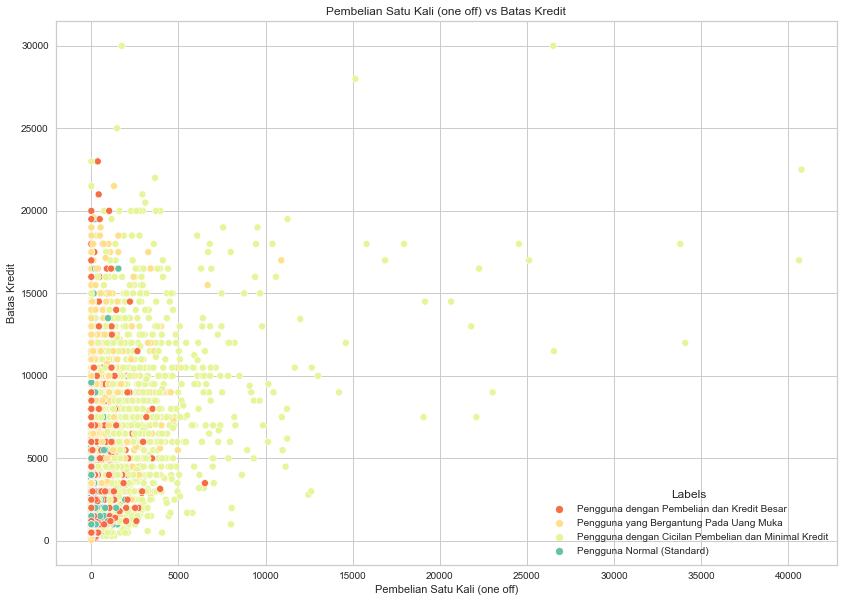

<Figure size 576x396 with 0 Axes>

In [60]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['ONEOFF_PURCHASES']
Y = data_umap_kmeans['CREDIT_LIMIT']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['Labels'], palette = 'Spectral')
g.set_xlabel('Pembelian Satu Kali (one off)')
g.set_ylabel('Batas Kredit')
g.set_title('Pembelian Satu Kali (one off) vs Batas Kredit')

plt.show()

plt.savefig("Pembelian Satu Kali (one off) vs Batas Kredit UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

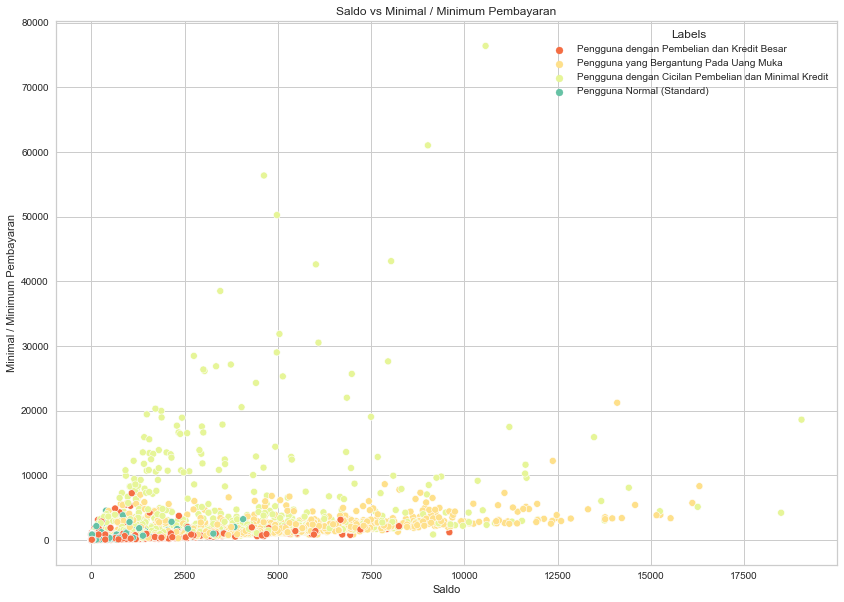

<Figure size 576x396 with 0 Axes>

In [61]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['BALANCE']
Y = data_umap_kmeans['MINIMUM_PAYMENTS']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['Labels'], palette = 'Spectral')
g.set_xlabel('Saldo')
g.set_ylabel('Minimal / Minimum Pembayaran')
g.set_title('Saldo vs Minimal / Minimum Pembayaran')

plt.show()

plt.savefig("Saldo vs Minimum Pembayaran UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

- Membuat pie chart yang sama dengan data yang menggunakan PCA untuk memvisualisasikan Jumlah Pengamatan per Segment

In [62]:
umap_kmeans_freq['JumlahPengamatan'] = data_umap_kmeans[['K-Means UMAP Segment', 'BALANCE']].groupby(['K-Means UMAP Segment']).count()
umap_kmeans_freq['ProporsiPengamatan'] = umap_kmeans_freq['JumlahPengamatan'] / umap_kmeans_freq['JumlahPengamatan'].sum()
umap_kmeans_freq = umap_kmeans_freq.rename({0:'Pengguna yang Bergantung Pada Uang Muka', 
                                            1:'Pengguna dengan Pembelian dan Kredit Besar',
                                            2:'Pengguna Normal (Standard)',
                                            3:'Pengguna dengan Cicilan Pembelian dan Minimal Kredit'})
umap_kmeans_freq

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,UMAP1,UMAP2,JumlahPengamatan,ProporsiPengamatan
K-Means UMAP Segment,,,,,,,,,,,,,,,,,,,,,
Pengguna yang Bergantung Pada Uang Muka,2812.761656,0.983509,337.139047,256.876409,80.460960,2195.831167,0.165093,0.104030,0.077225,0.288322,...,4.128834,5159.715342,2046.742448,1030.168660,0.026355,11.878744,9.309327,6.894590,2771,0.309609
Pengguna dengan Pembelian dan Kredit Besar,685.443185,0.649072,322.349885,249.340010,73.190063,741.535254,0.193135,0.099880,0.094841,0.101347,...,3.308176,3365.895064,1035.799183,396.640847,0.044725,10.742138,7.142129,2.974208,1908,0.213184
Pengguna Normal (Standard),140.980813,0.778875,574.679849,86.773946,488.425719,101.458072,0.777247,0.048623,0.711740,0.020145,...,12.275115,3108.479642,718.589467,209.044588,0.491585,11.067630,2.648892,4.147885,1523,0.170168
Pengguna dengan Cicilan Pembelian dan Minimal Kredit,1705.002832,0.983120,2385.076408,1449.276739,936.164152,402.794172,0.865690,0.458190,0.648758,0.067885,...,34.645197,5375.330819,2463.390667,1384.601730,0.170559,11.940320,4.331818,7.633863,2748,0.307039


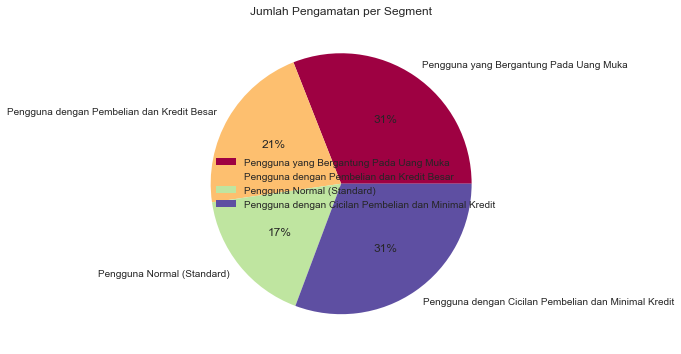

<Figure size 576x396 with 0 Axes>

In [63]:
umap_kmeans_freq.plot.pie(y='JumlahPengamatan', figsize=(6, 6), autopct='%1.0f%%', cmap = 'Spectral')
plt.ylabel(None, loc='center')
plt.legend(loc='center right')
plt.title('Jumlah Pengamatan per Segment')
plt.show()

plt.savefig("Jumlah Pengamatan per Segment UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

# Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia.

In [64]:
# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [65]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Menghapus kolom yang tidak diperlukan

In [66]:
drop_cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
             'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX']

In [67]:
data = df.drop(drop_cols, axis=1)
data.head()

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763,244.791237,0.000000,12


In [68]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


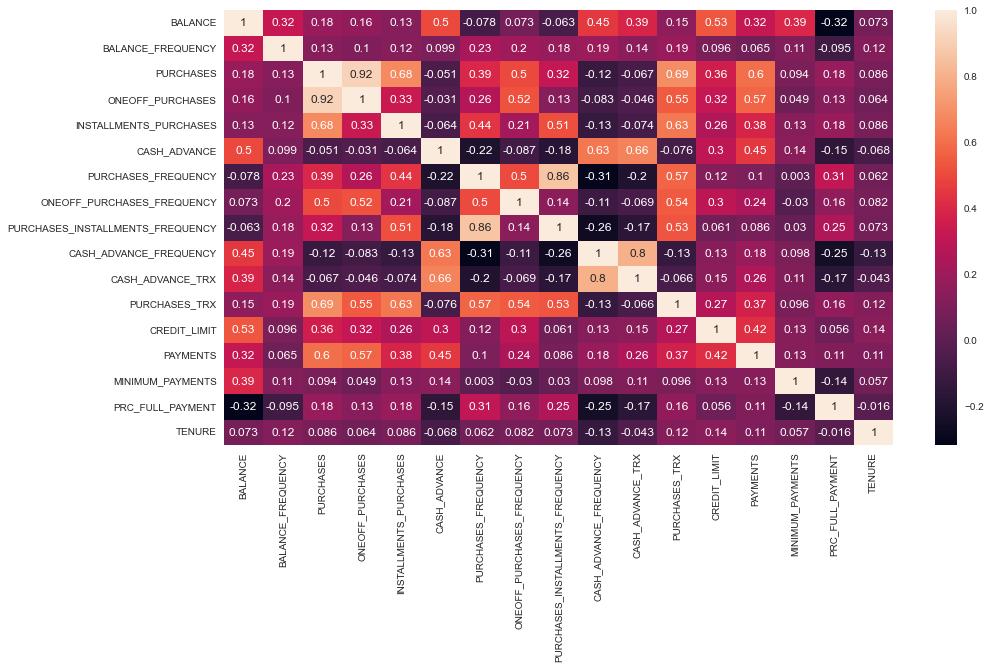

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.savefig('corr_matrix.png')

Melakukan inisialisasi variabel X dan Y

In [70]:
X = data.drop(['CUST_ID'], axis=1)
y = data['CUST_ID']

print(X.shape)
print(y.shape)

(8950, 10)
(8950,)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.20, random_state=13)

In [72]:
print(X_train.shape)
print(X_test.shape)

(7160, 10)
(1790, 10)


# Kesimpulan

Dari analisis yang telah kami lakukan, diperoleh kesimpulan sebagai berikut:
- Pada analisa kali ini kami menggunakan model KMeans, PCA, dan bantuan UMAP Application untuk melakukan clustering pada data pengguna kartu kredit
- Pada KMeans kami memilih 4 cluster berdasarkan pengamatan pada elbow method
- Alasan penggunaan UMAP Application yaitu karena UMAP bekerja dengan baik dalam menemukan kesamaan dan dapat mempertahankan struktur global data. Dengan menggunakan 2 component berdasarkan UMAP, kami memperoleh kelompok cluster yang lebih seimbang dan masih menemukan beberapa perbedaan besar di antara mereka.
- Pada analisis ini kami juga membuat beberapa visualisasi menggunakan lineplot, boxplot, histogram, pie chart, dan juga kami melakukan beberapa contoh groupby dan query terhadap data yang ada
- Untuk mengatasi missing value pada analisis ini kami menggunakan pengisian missing value dengan menggunakan median